1. Are those with children more likely to feel stress than adults without dependences?
2. How does the number of dependencies and their age group affect stress levels in parents/head of household (HoH)?
3. Do stress levels differ between male and female population?
4. Do stress levels differ between male and female parents?


PHQ4_1-4 - Patient health questionnaire, response scale of 1-4 for frequency
1. Little interest or pleasure in doing things
2. Feeling down, depressed, or hopeless
3. Feeling nervous, anxious, or on edge
4. Not being able to stop or control worrying

    Recoded answers:
        1. Not at all
        2. Several days
        3. More than half the days
        4. Nearly everyday
        
child_age_1-5 - Number of children within the 5 age groups
1. 0-2
2. 3-11
3. 12-18
4. 19+
5. N/A


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max.columns", None)
sns.set_style("darkgrid")

In [204]:
ucl_data_org = pd.read_csv('covid19tracker_recoded.csv')

In [205]:
ucl_data_org.head()

,state,endtime,gender,age,household_size,household_children,child_age_1,child_age_2,child_age_3,child_age_4,child_age_5,child_education_1,child_education_2,child_education_3,child_education_4,i10_health,i11_health,r1_1,WCRV_4,employment_status,cantril_ladder,PHQ4_1,PHQ4_2,PHQ4_3,PHQ4_4,CORE_B2_4,w4_1,w4_2,w4_3,w4_4,w4_5,w4_6,w4_7,w4_8,w4_9,w4_10,w4_11,w4_99,w4b,employment_status.cat,PHQ4_sum,child_education_sum
0,California,02/04/2020 08:11,Female,33,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,Not working,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,Pennsylvania,02/04/2020 08:12,Male,38,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,Full time employment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,Florida,02/04/2020 08:15,Female,48,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,Full time employment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,California,02/04/2020 08:15,Male,31,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,Unemployed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,Florida,02/04/2020 08:15,Female,69,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,Retired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
ucl_data_org.columns

Index(['state', 'endtime', 'gender', 'age', 'household_size',
       'household_children', 'child_age_1', 'child_age_2', 'child_age_3',
       'child_age_4', 'child_age_5', 'child_education_1', 'child_education_2',
       'child_education_3', 'child_education_4', 'i10_health', 'i11_health',
       'r1_1', 'WCRV_4', 'employment_status', 'cantril_ladder', 'PHQ4_1',
       'PHQ4_2', 'PHQ4_3', 'PHQ4_4', 'CORE_B2_4', 'w4_1', 'w4_2', 'w4_3',
       'w4_4', 'w4_5', 'w4_6', 'w4_7', 'w4_8', 'w4_9', 'w4_10', 'w4_11',
       'w4_99', 'w4b', 'employment_status.cat', 'PHQ4_sum',
       'child_education_sum'],
      dtype='object')

In [213]:
ucl_data = ucl_data_org[['state', 'endtime', 'gender', 'age', 'household_size',
       'household_children', 'child_age_1', 'child_age_2', 'child_age_3',
       'child_age_4', 'child_age_5', 'cantril_ladder', 'PHQ4_1',
       'PHQ4_2', 'PHQ4_3', 'PHQ4_4', 'PHQ4_sum']]
ucl_data = ucl_data[ucl_data['PHQ4_sum'].notna()]
ucl_data

,state,endtime,gender,age,household_size,household_children,child_age_1,child_age_2,child_age_3,child_age_4,child_age_5,cantril_ladder,PHQ4_1,PHQ4_2,PHQ4_3,PHQ4_4,PHQ4_sum
4976,Georgia,30/04/2020 16:33,Male,40,3.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,2.0,1.0,3.0,10.0
4977,New Jersey,30/04/2020 16:31,Female,62,3.0,0.0,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,2.0,1.0,6.0
4978,Indiana,30/04/2020 16:32,Female,61,2.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0,1.0,1.0,1.0,4.0
4979,Virginia,30/04/2020 16:34,Female,60,2.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0,1.0,1.0,1.0,5.0
4980,Michigan,30/04/2020 16:34,Female,37,2.0,0.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0,3.0,3.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31919,New York,14/09/2021 16:32,Male,44,1.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1.0,1.0,1.0,4.0
31920,Rhode Island,14/09/2021 23:30,Male,30,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,2.0,4.0,4.0,12.0
31923,Connecticut,16/09/2021 00:50,Female,37,4.0,2.0,1.0,0.0,0.0,0.0,0.0,8.0,3.0,1.0,3.0,3.0,10.0
31924,New Mexico,16/09/2021 04:22,Female,41,NaN,1.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,2.0,5.0


In [232]:
ucl_data['household_children'].value_counts(normalize=True)

0.0    0.674899
1.0    0.127468
2.0    0.115291
3.0    0.045354
4.0    0.020941
5.0    0.016047
Name: household_children, dtype: float64

In [237]:
ucl_data['parent'] = np.where(ucl_data['household_children'] > 0, 1, 0)
ucl_data

,state,endtime,gender,age,household_size,household_children,child_age_1,child_age_2,child_age_3,child_age_4,child_age_5,cantril_ladder,PHQ4_1,PHQ4_2,PHQ4_3,PHQ4_4,PHQ4_sum,parent
4976,Georgia,30/04/2020 16:33,Male,40,3.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,2.0,1.0,3.0,10.0,1
4977,New Jersey,30/04/2020 16:31,Female,62,3.0,0.0,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,2.0,1.0,6.0,0
4978,Indiana,30/04/2020 16:32,Female,61,2.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0,1.0,1.0,1.0,4.0,0
4979,Virginia,30/04/2020 16:34,Female,60,2.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0,1.0,1.0,1.0,5.0,0
4980,Michigan,30/04/2020 16:34,Female,37,2.0,0.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0,3.0,3.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31919,New York,14/09/2021 16:32,Male,44,1.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1.0,1.0,1.0,4.0,0
31920,Rhode Island,14/09/2021 23:30,Male,30,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,2.0,4.0,4.0,12.0,1
31923,Connecticut,16/09/2021 00:50,Female,37,4.0,2.0,1.0,0.0,0.0,0.0,0.0,8.0,3.0,1.0,3.0,3.0,10.0,1
31924,New Mexico,16/09/2021 04:22,Female,41,NaN,1.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,2.0,5.0,1


In [238]:
ucl_data['parent'].value_counts()

0    12006
1     5713
Name: parent, dtype: int64

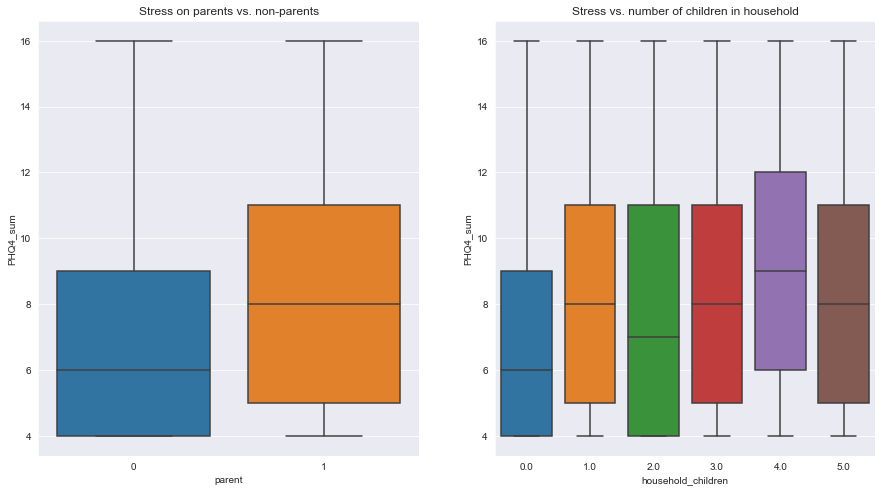

In [302]:
fig, ax = plt.subplots(1,2, figsize=(15, 8));
sns.boxplot(ax=ax[0], x='parent', y='PHQ4_sum', data=ucl_data);
ax[0].set_title("Stress on parents vs. non-parents");
sns.boxplot(ax=ax[1], x='household_children', y='PHQ4_sum', data=ucl_data);
ax[1].set_title("Stress vs. number of children in household");

#labels need to be changed later ie. "5 or more")

parents are more likely to be stressed than non parents

In [105]:
ucl_data.gender.value_counts()

Female    16796
Male      15130
Name: gender, dtype: int64

Text(0.5, 1.0, 'Not being able to stop or control worrying')

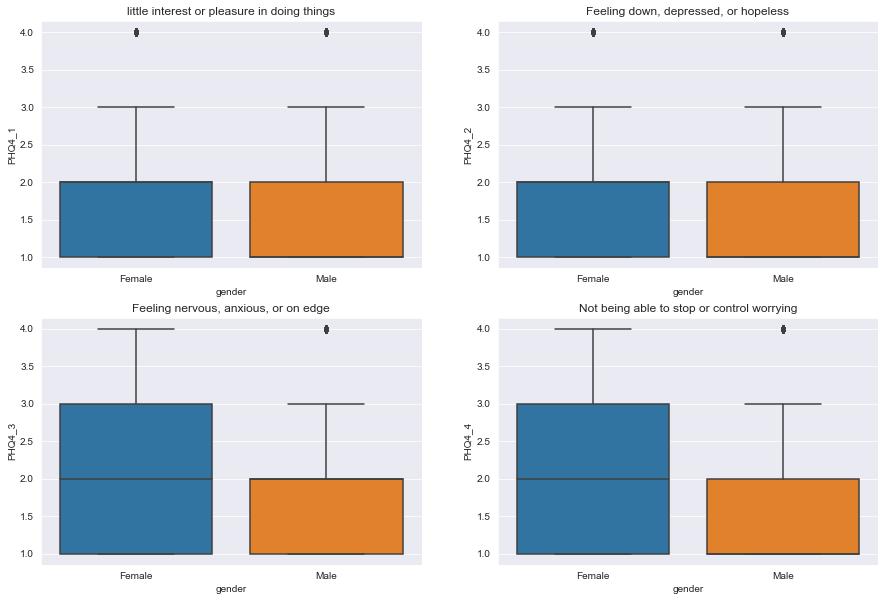

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(ax=axes[0,0], x= 'gender', y= 'PHQ4_1', data= ucl_data)
axes[0,0].set_title("little interest or pleasure in doing things")
sns.boxplot(ax=axes[0,1], x= 'gender', y= 'PHQ4_2', data= ucl_data)
axes[0,1].set_title("Feeling down, depressed, or hopeless")
sns.boxplot(ax=axes[1,0], x= 'gender', y= 'PHQ4_3', data= ucl_data)
axes[1,0].set_title("Feeling nervous, anxious, or on edge")
sns.boxplot(ax=axes[1,1], x= 'gender', y= 'PHQ4_4', data= ucl_data)
axes[1,1].set_title("Not being able to stop or control worrying")

 1. Not at all
 2. Several days
 3. More than half the days
 4. Nearly everyday
 
 Women are more likely to feel nervous, anxious, and worry more then men.
 

<AxesSubplot:xlabel='gender', ylabel='PHQ4_sum'>

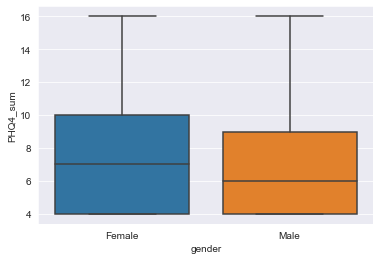

In [24]:
sns.boxplot(x = 'gender', y= 'PHQ4_sum', data= ucl_data)

# Stress vs. number dependencies

<AxesSubplot:xlabel='household_size', ylabel='cantril_ladder'>

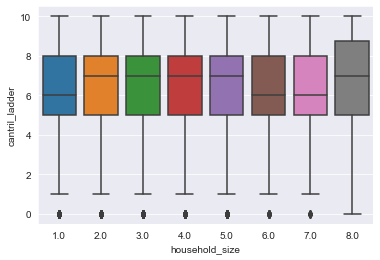

In [51]:
sns.boxplot(x='household_size', y= 'cantril_ladder', data=ucl_data)

<AxesSubplot:xlabel='household_size', ylabel='PHQ4_sum'>

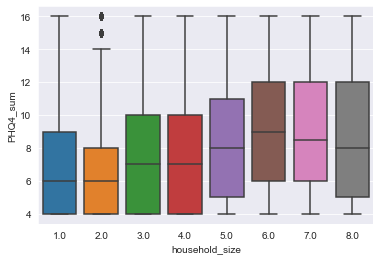

In [40]:
sns.boxplot(x= 'household_size', y= 'PHQ4_sum', data=ucl_data)

In [79]:
#household_children/(household_size-household_children) = children/adult ratio
ucl_data['children/total_size ratio'] = ucl_data.apply(lambda x: x.household_children/x.household_size, axis=1)

In [87]:
male_df = ucl_data[ucl_data['gender']== 'Male']
female_df = ucl_data[ucl_data['gender']== 'Female']
female_df

,state,endtime,gender,age,household_size,household_children,child_age_1,child_age_2,child_age_3,child_age_4,child_age_5,child_education_1,child_education_2,child_education_3,child_education_4,i10_health,i11_health,r1_1,WCRV_4,employment_status,cantril_ladder,PHQ4_1,PHQ4_2,PHQ4_3,PHQ4_4,CORE_B2_4,w4_1,w4_2,w4_3,w4_4,w4_5,w4_6,w4_7,w4_8,w4_9,w4_10,w4_11,w4_99,w4b,employment_status.cat,PHQ4_sum,child_education_sum,children/total_size ratio
0,California,02/04/2020 08:11,Female,33,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,Not working,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.400000
2,Florida,02/04/2020 08:15,Female,48,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,Full time employment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.000000
4,Florida,02/04/2020 08:15,Female,69,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,Retired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
6,Ohio,02/04/2020 08:16,Female,56,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,Not working,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.000000
9,Ohio,02/04/2020 08:18,Female,59,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,Unemployed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31917,California,14/09/2021 15:26,Female,18,3.0,2.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,Full time student,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667
31918,Arizona,14/09/2021 15:32,Female,21,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,Full time employment,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.000000
31921,New York,15/09/2021 10:58,Female,31,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Other,1.0,1.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31923,Connecticut,16/09/2021 00:50,Female,37,4.0,2.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,Not working,8.0,3.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10.0,NaN,0.500000


In [287]:
female_count_df = female_df.PHQ4_sum.value_counts(normalize=True).rename_axis('PHQ4_sum').reset_index(name='counts')
male_count_df = male_df.PHQ4_sum.value_counts(normalize=True).rename_axis('PHQ4_sum').reset_index(name='counts')
#print(female_count_df['female_counts'].sum())
female_count_df['gender'] = 'female'
male_count_df['gender'] = 'male'
count_df = pd.concat([male_count_df, female_count_df])
count_df

,PHQ4_sum,counts,gender
0,4.0,0.367955,male
1,5.0,0.095382,male
2,6.0,0.091262,male
3,8.0,0.091019,male
4,7.0,0.074052,male
5,10.0,0.050297,male
6,12.0,0.047873,male
7,9.0,0.046297,male
8,11.0,0.038904,male
9,16.0,0.031875,male


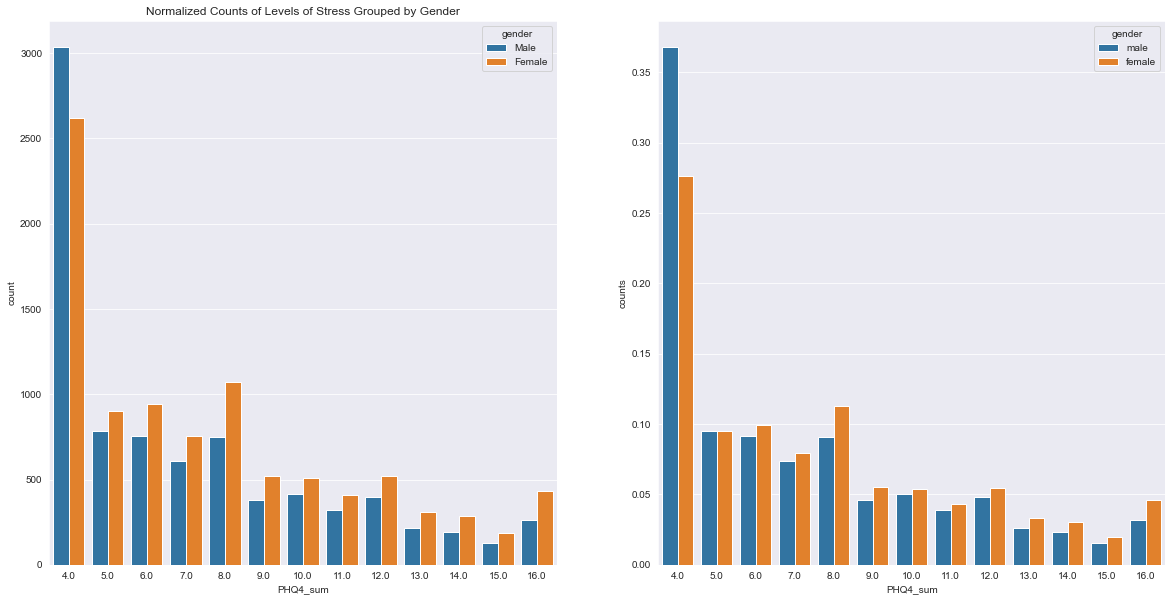

In [307]:
fig, axes2 = plt.subplots(1, 2, figsize=(20, 10));
sns.countplot(ax=axes2[0], x='PHQ4_sum', hue="gender", dodge=True, data=ucl_data);
axes2[0].set_title('Counts of Levels of Stress Grouped by Gender');
sns.barplot(x='PHQ4_sum', y='counts', hue='gender', dodge=True, data=count_df);
axes2[0].set_title('Normalized Counts of Levels of Stress Grouped by Gender');

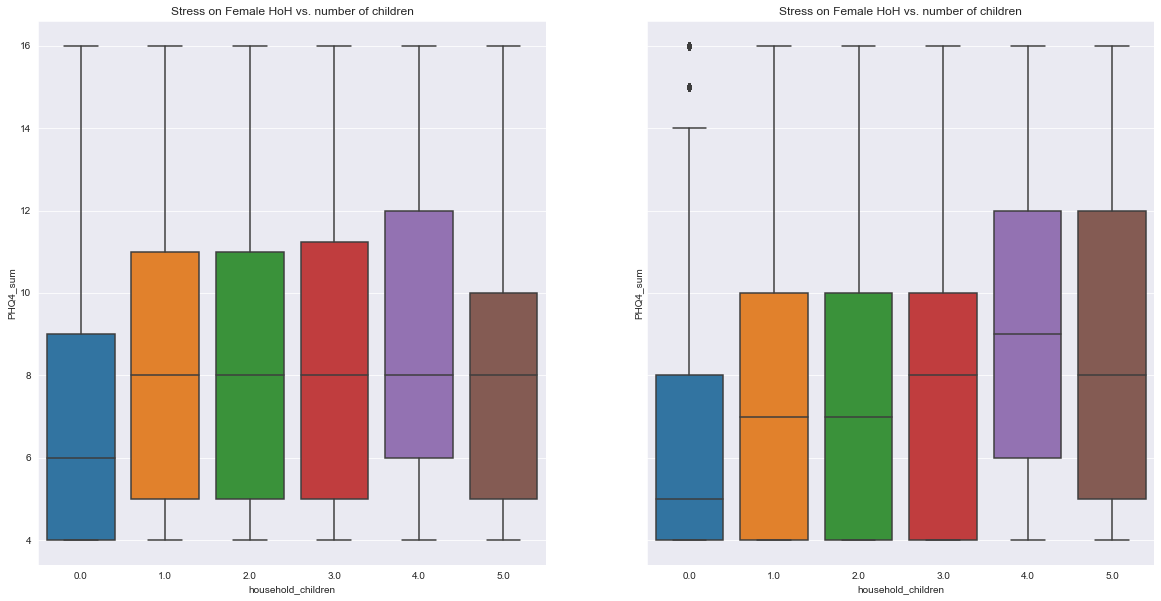

In [301]:
fig, axes3 = plt.subplots(1, 2, figsize=(20, 10), sharey=True);
sns.boxplot(ax=axes3[0], x= "household_children", y="PHQ4_sum", data=female_df);
axes3[0].set_title('Stress on Female HoH vs. number of children');
sns.boxplot(ax=axes3[1], x="household_children", y= "PHQ4_sum", data=male_df);
axes3[1].set_title('Stress on Female HoH vs. number of children');